In [2]:
#outlier >>are the exterme value
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [22]:
salary=[11,28,40,26,60,56,90,12,33,45,66,92,67,34,12,58,90,22,12,65,45,11,233,2,20,0]

In [23]:
#five point summary
#min,25th,50th percentile,75percentle ,100th percentile

In [24]:
np.quantile(salary,[0,0.25,0.50,0.75,1])

array([  0.  ,  14.  ,  37.  ,  63.75, 233.  ])

In [26]:
df=pd.DataFrame(salary,columns=['Salary'])

In [27]:
df.describe()

,Salary
count,26.000000
mean,47.307692
std,46.840811
min,0.000000
25%,14.000000
50%,37.000000
75%,63.750000
max,233.000000


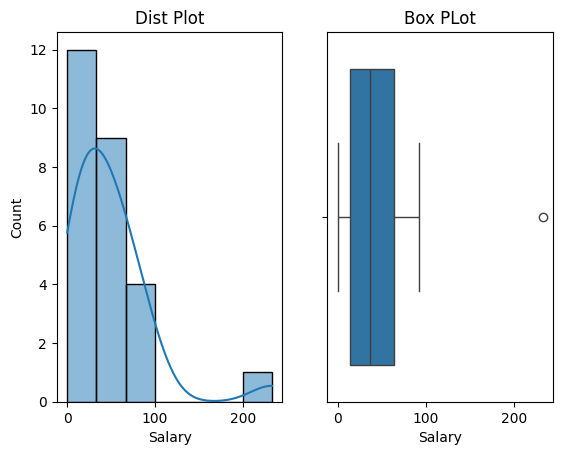

In [28]:
#to check outlier >> displot ,boxplot
plt.Figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Salary'],kde=True)
plt.title("Dist Plot")

plt.subplot(1,2,2)
sns.boxplot(data=df,x='Salary')
plt.title('Box PLot')
plt.show()

In [29]:
#four types of the outlier 
#dropping the outlier 
#copping the outlier 
#replace with mean and meadian 


In [35]:
#drooping the outlier 
q1=df['Salary'].quantile(0.25)
q3=df['Salary'].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

df_filter=df[(df.Salary>=lower_fence) & (df.Salary<=upper_fence)]

In [31]:
df.shape

(26, 1)

In [36]:
df_filter.shape

(25, 1)

In [45]:
#imputation of the mean and meadian 
df['df_saalray_imputed_mean']=np.where((df.Salary>=upper_fence) | (df.Salary<=lower_fence),df['Salary'].mean(),df['Salary'])

In [46]:
df

,Salary,df_saalray_imputed_mean
0,11,11.000000
1,28,28.000000
2,40,40.000000
3,26,26.000000
4,60,60.000000
5,56,56.000000
6,90,90.000000
7,12,12.000000
8,33,33.000000
9,45,45.000000


In [49]:
#Imputed to meadin
df['Imputed Meadian']=np.where((df.Salary<=upper_fence)| (df.Salary>=lower_fence),df['Salary'].median(),df['Salary'])

In [50]:
df

,Salary,df_saalray_imputed_mean,Imputed Meadian
0,11,11.000000,37.0
1,28,28.000000,37.0
2,40,40.000000,37.0
3,26,26.000000,37.0
4,60,60.000000,37.0
5,56,56.000000,37.0
6,90,90.000000,37.0
7,12,12.000000,37.0
8,33,33.000000,37.0
9,45,45.000000,37.0


In [51]:
#df >> replacng the nearest value which is not outlier 
df

,Salary,df_saalray_imputed_mean,Imputed Meadian
0,11,11.000000,37.0
1,28,28.000000,37.0
2,40,40.000000,37.0
3,26,26.000000,37.0
4,60,60.000000,37.0
5,56,56.000000,37.0
6,90,90.000000,37.0
7,12,12.000000,37.0
8,33,33.000000,37.0
9,45,45.000000,37.0


In [52]:
Lower_cap=df['Salary'].quantile(0.05)#lower cap for the 5th percentile
Upper_cap=df['Salary'].quantile(0.95)#upper cap as the 95th percentile


In [53]:
Lower_cap

np.float64(4.25)

In [55]:
Upper_cap

np.float64(91.5)

In [56]:
#replace outlier with the cap
#if df['Salary]<lower_cap,satisfed then lower_cap if df['Salary']>Upper_cap,Upper_cap
#otherwise keep salary as it is 
df['Salary_capped']= np.where(df['Salary']<Lower_cap, Lower_cap,np.where(df['Salary']>Upper_cap,Upper_cap ,df['Salary']))

In [58]:
df

,Salary,df_saalray_imputed_mean,Imputed Meadian,Salary_capped
0,11,11.000000,37.0,11.00
1,28,28.000000,37.0,28.00
2,40,40.000000,37.0,40.00
3,26,26.000000,37.0,26.00
4,60,60.000000,37.0,60.00
5,56,56.000000,37.0,56.00
6,90,90.000000,37.0,90.00
7,12,12.000000,37.0,12.00
8,33,33.000000,37.0,33.00
9,45,45.000000,37.0,45.00


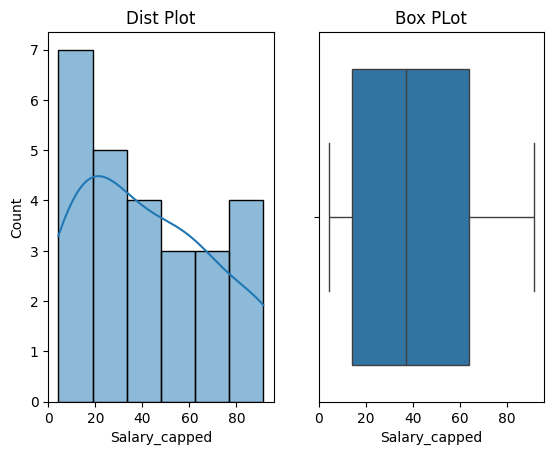

In [59]:
plt.Figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Salary_capped'],kde=True)
plt.title("Dist Plot")

plt.subplot(1,2,2)
sns.boxplot(data=df,x='Salary_capped')
plt.title('Box PLot')
plt.show()